# Naive bayes classifier

Create a Naive Bayes classifier for each handwritten digit that support discrete and continuous features

### inputs

- Training image data from [MNIST](http://yann.lecun.com/exdb/mnist/) 

### outputs

- posterior (in log scale to avoid underflow) of the ten categories (0-9) for each row in INPUT 3 
- error rate 

In [30]:
import matplotlib.pyplot as plt
from functools import reduce

In [54]:
def showBytesImage(byte, row = 28, col = 28):
    im = [[byte[i*28 + j] for j in range(col)] for i in range(row)]
    
    plt.imshow(im, cmap='gray')
    

class idx_file():
    def __init__(self, file):
        self.filename = file
        self.datas = []
        
        with open(self.filename, mode='rb') as f:
            magic_number = f.read(4)
            
            self.n_dim = magic_number[-1]
            
            self.n_dims = [int.from_bytes(f.read(4), byteorder='big') for _ in range(self.n_dim)]
    
            for idx in range(self.n_dims[0]):
                item = f.read(reduce(lambda x,y: x*y, (self.n_dims[1:] + [1])))
        
                self.datas.append(item)
        

In [109]:
%%time

train_images = idx_file('train-images.idx3-ubyte')

train_labels = idx_file('train-labels.idx1-ubyte')

test_images = idx_file('t10k-images.idx3-ubyte')

test_labels = idx_file('t10k-labels.idx1-ubyte')

CPU times: user 195 ms, sys: 28 ms, total: 223 ms
Wall time: 223 ms


In [46]:
len(train_images)

60000

b'\x03'


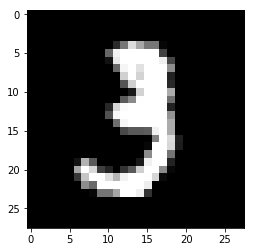

In [60]:
showBytesImage(train_images.datas[10])
print(train_labels.datas[10])

b'\x00'


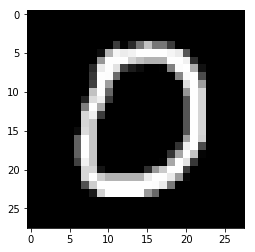

In [110]:
showBytesImage(test_images.datas[10])
print(test_labels.datas[10])

### handle feature

- discrete

map 0 ~ 255 into 0 ~ 31 bins
note : handle empty bins

- continuous

use gaussian distribution

In [87]:
%%time
for i in train_images.datas:
    tmp = [j for j in i]
    continue

CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.28 s


In [85]:
%%time
for _, i in enumerate(train_images.datas):
    tmp = [j for j in i]
    continue

CPU times: user 1.25 s, sys: 0 ns, total: 1.25 s
Wall time: 1.25 s


In [106]:
# class, pixels, bins

Pixel_P = [[[1 for _ in range(32)] for _ in range(28*28)] for _ in range(10)]
Class_P = [0 for _ in range(10)]

In [107]:
%%time
for idx, bs in enumerate(train_images.datas):
    Class_P[train_labels.datas[idx][0]] += 1
    for i in range(len(bs)):
        Pixel_P[train_labels.datas[idx][0]][i][bs[i]>>3] += 1

CPU times: user 21 s, sys: 11.6 ms, total: 21 s
Wall time: 21 s


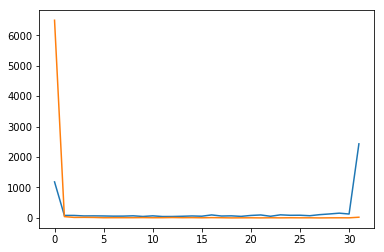

In [97]:
plt.plot(range(32), Pixel_P[0][300])
plt.plot(range(32), Pixel_P[1][300])

In [98]:
print(Pixel_P[1][300])

[6493, 44, 17, 19, 16, 7, 8, 8, 8, 11, 7, 8, 13, 8, 10, 5, 10, 7, 2, 4, 5, 2, 6, 3, 6, 4, 5, 1, 4, 5, 4, 24]


In [108]:
print(Class_P[1])
sum(Pixel_P[1][0])

6742


6774

In [126]:
import numpy as np
from math import log

In [128]:
%%time

error = 0
Posterior = [[0 for _ in range(10)] for _ in range(len(test_images.datas))]
for idx, bs in enumerate(test_images.datas):
    for num in range(10):
        for i in range(len(bs)):
            Posterior[idx][num] += log(Pixel_P[num][i][bs[i]>>3])
        Posterior[idx][num] += log(Class_P[num])
    
    predict = np.argmax(Posterior[idx])
    answer = test_labels.datas[idx][0]
    
    if predict != answer:
        error += 1

CPU times: user 49.5 s, sys: 67.8 ms, total: 49.6 s
Wall time: 49.6 s


In [129]:
print('predict : ' + str(np.argmax(Posterior[87])) + ', answer : ' + str(test_labels.datas[87][0]))

predict : 3, answer : 3


In [130]:
print(error/len(test_images.datas))

0.2969


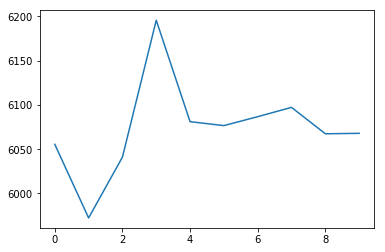

In [131]:
plt.plot(range(10), Posterior[87])